In [30]:
!pip install paho-mqtt pandas matplotlib


In [29]:
import paho.mqtt.client as mqtt
import json
import random
import time
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

BROKER = "test.mosquitto.org"
PORT = 1883
TOPIC = "iot/light/latip_demo_2025"


In [31]:
data = []

def on_connect(client, userdata, flags, rc):
    print("Connected to MQTT broker")
    client.subscribe(TOPIC)

def on_message(client, userdata, msg):
    payload = json.loads(msg.payload.decode())
    lux = payload["light"]
    data.append({
        "time": datetime.now(),
        "lux": lux
    })
    print("Received:", lux, "lux")

client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message

client.connect(BROKER, PORT, 60)
client.loop_start()

# Отправка данных (симуляция light sensor)
for i in range(15):
    light_value = random.randint(100, 1000)
    payload = json.dumps({"light": light_value})

    client.publish(TOPIC, payload)
    print("Sent:", light_value, "lux")
    time.sleep(2)

client.loop_stop()

df = pd.DataFrame(data)
df


/tmp/ipython-input-1397063077.py:16: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client()


Sent: 843 lux
Connected to MQTT broker
Sent: 742 lux
Received: 742 lux
Sent: 673 lux
Received: 673 lux
Sent: 871 lux
Received: 871 lux
Sent: 142 lux
Received: 142 lux
Sent: 119 lux
Received: 119 lux
Sent: 684 lux
Received: 684 lux
Sent: 773 lux
Received: 773 lux
Sent: 814 lux
Received: 814 lux
Sent: 884 lux
Received: 884 lux
Sent: 130 lux
Received: 130 lux
Sent: 418 lux
Received: 418 lux
Sent: 144 lux
Received: 144 lux
Sent: 829 lux
Received: 829 lux
Sent: 844 lux
Received: 844 lux


,time,lux
0,2026-01-02 10:28:12.343141,742
1,2026-01-02 10:28:14.229224,673
2,2026-01-02 10:28:16.200463,871
3,2026-01-02 10:28:18.205619,142
4,2026-01-02 10:28:20.272141,119
5,2026-01-02 10:28:22.200317,684
6,2026-01-02 10:28:24.234723,773
7,2026-01-02 10:28:26.235900,814
8,2026-01-02 10:28:28.244074,884
9,2026-01-02 10:28:30.239723,130


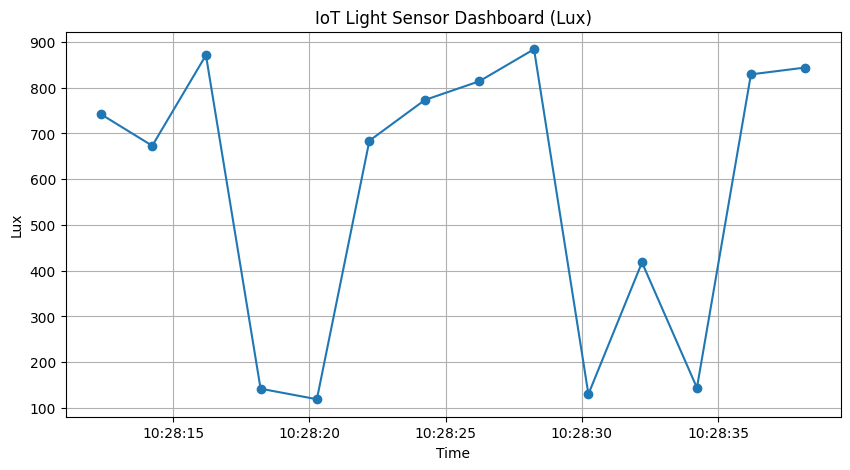

In [32]:
plt.figure(figsize=(10,5))
plt.plot(df["time"], df["lux"], marker="o")
plt.title("IoT Light Sensor Dashboard (Lux)")
plt.xlabel("Time")
plt.ylabel("Lux")
plt.grid(True)
plt.show()


In [33]:
print("📊 Light Sensor Statistics")
print("Min lux:", df["lux"].min())
print("Max lux:", df["lux"].max())
print("Average lux:", round(df["lux"].mean(), 2))


📊 Light Sensor Statistics
Min lux: 119
Max lux: 884
Average lux: 576.21


In [34]:
df.to_csv("light_sensor_data.csv", index=False)
print("CSV file saved: light_sensor_data.csv")


CSV file saved: light_sensor_data.csv


In [35]:
# Thresholds (lux)
LOW_LIGHT_THRESHOLD = 300
HIGH_LIGHT_THRESHOLD = 800

print("⚙️ Thresholds set:")
print("Low light <", LOW_LIGHT_THRESHOLD, "lux")
print("High light >", HIGH_LIGHT_THRESHOLD, "lux")


⚙️ Thresholds set:
Low light < 300 lux
High light > 800 lux


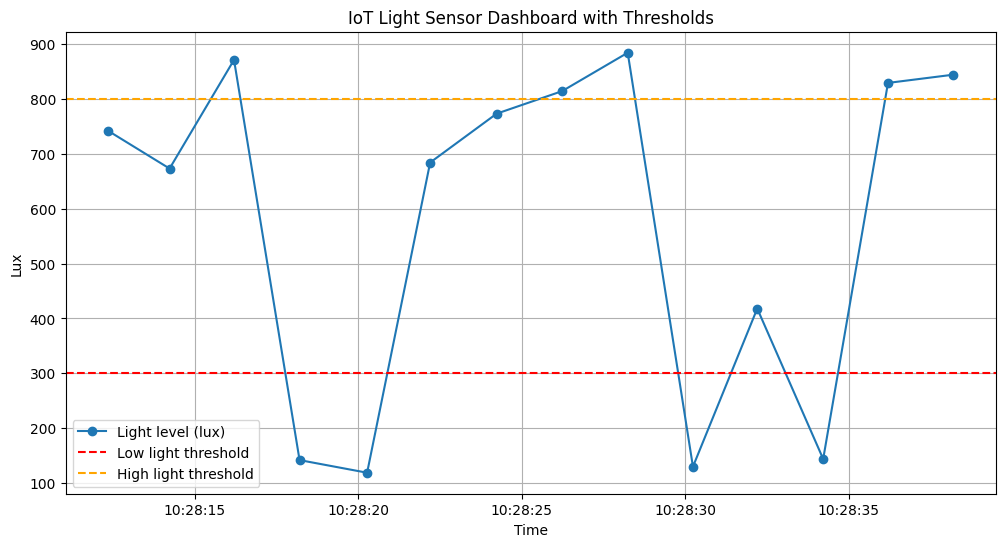

In [36]:
plt.figure(figsize=(12,6))

plt.plot(df["time"], df["lux"], marker="o", label="Light level (lux)")

# Threshold lines
plt.axhline(LOW_LIGHT_THRESHOLD, color="red", linestyle="--", label="Low light threshold")
plt.axhline(HIGH_LIGHT_THRESHOLD, color="orange", linestyle="--", label="High light threshold")

plt.title("IoT Light Sensor Dashboard with Thresholds")
plt.xlabel("Time")
plt.ylabel("Lux")
plt.legend()
plt.grid(True)

plt.show()


In [37]:
alerts = []

for index, row in df.iterrows():
    if row["lux"] < LOW_LIGHT_THRESHOLD:
        alerts.append((row["time"], row["lux"], "⚠️ LOW LIGHT"))
    elif row["lux"] > HIGH_LIGHT_THRESHOLD:
        alerts.append((row["time"], row["lux"], "⚠️ HIGH LIGHT"))

alerts_df = pd.DataFrame(alerts, columns=["time", "lux", "alert"])
alerts_df


,time,lux,alert
0,2026-01-02 10:28:16.200463,871,⚠️ HIGH LIGHT
1,2026-01-02 10:28:18.205619,142,⚠️ LOW LIGHT
2,2026-01-02 10:28:20.272141,119,⚠️ LOW LIGHT
3,2026-01-02 10:28:26.235900,814,⚠️ HIGH LIGHT
4,2026-01-02 10:28:28.244074,884,⚠️ HIGH LIGHT
5,2026-01-02 10:28:30.239723,130,⚠️ LOW LIGHT
6,2026-01-02 10:28:34.223946,144,⚠️ LOW LIGHT
7,2026-01-02 10:28:36.206379,829,⚠️ HIGH LIGHT
8,2026-01-02 10:28:38.206792,844,⚠️ HIGH LIGHT


In [38]:
last_lux = df["lux"].iloc[-1]

if last_lux < LOW_LIGHT_THRESHOLD:
    print("🚨 ALERT: Light level is TOO LOW!", last_lux, "lux")
elif last_lux > HIGH_LIGHT_THRESHOLD:
    print("🚨 ALERT: Light level is TOO HIGH!", last_lux, "lux")
else:
    print("✅ Light level is NORMAL:", last_lux, "lux")


🚨 ALERT: Light level is TOO HIGH! 844 lux


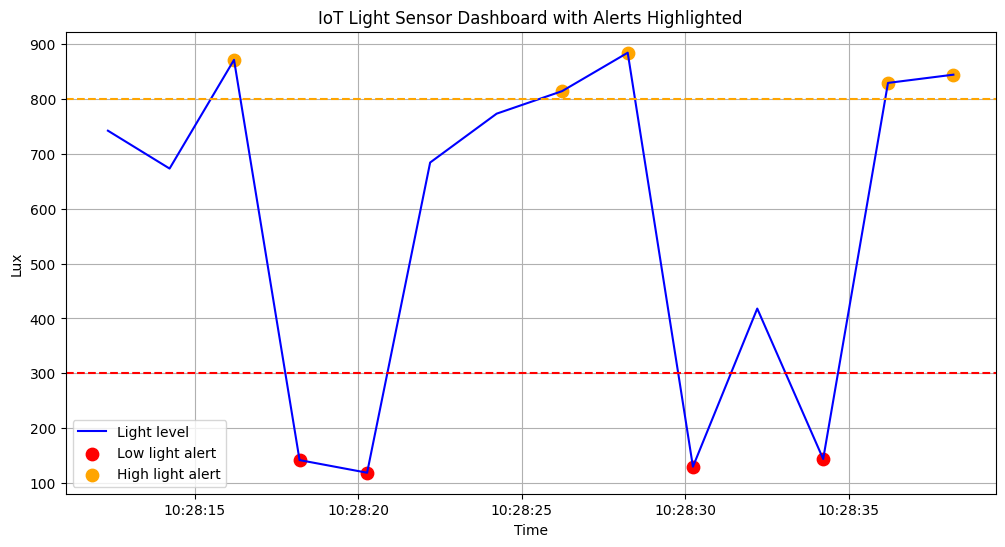

In [39]:
plt.figure(figsize=(12,6))

# Normal points
plt.plot(df["time"], df["lux"], color="blue", label="Light level")

# Highlight alerts
low_points = df[df["lux"] < LOW_LIGHT_THRESHOLD]
high_points = df[df["lux"] > HIGH_LIGHT_THRESHOLD]

plt.scatter(low_points["time"], low_points["lux"], color="red", label="Low light alert", s=80)
plt.scatter(high_points["time"], high_points["lux"], color="orange", label="High light alert", s=80)

plt.axhline(LOW_LIGHT_THRESHOLD, color="red", linestyle="--")
plt.axhline(HIGH_LIGHT_THRESHOLD, color="orange", linestyle="--")

plt.title("IoT Light Sensor Dashboard with Alerts Highlighted")
plt.xlabel("Time")
plt.ylabel("Lux")
plt.legend()
plt.grid(True)

plt.show()
